In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

# merging two csv files
df = pd.concat(
    map(pd.read_csv, ["../BITS PILANI FINAL PROJECT/2007.csv", "../BITS PILANI FINAL PROJECT/2008.csv"]), ignore_index=True)

# See Sample data
df.head()

# column details of the data set for an insight into the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14462943 entries, 0 to 14462942
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay    

In [5]:
#New Depart_Date column created with year, month and day

df['Depart_Date'] = pd.to_datetime(df.Year*10000+df.Month*100+df.DayofMonth,format='%Y%m%d')
variables_to_remove = ['Year','Month','DayofMonth','CRSArrTime','CRSElapsedTime','CRSDepTime','ArrTime','DepDelay','FlightNum','TailNum']
df.drop(variables_to_remove, axis = 1, inplace = True)


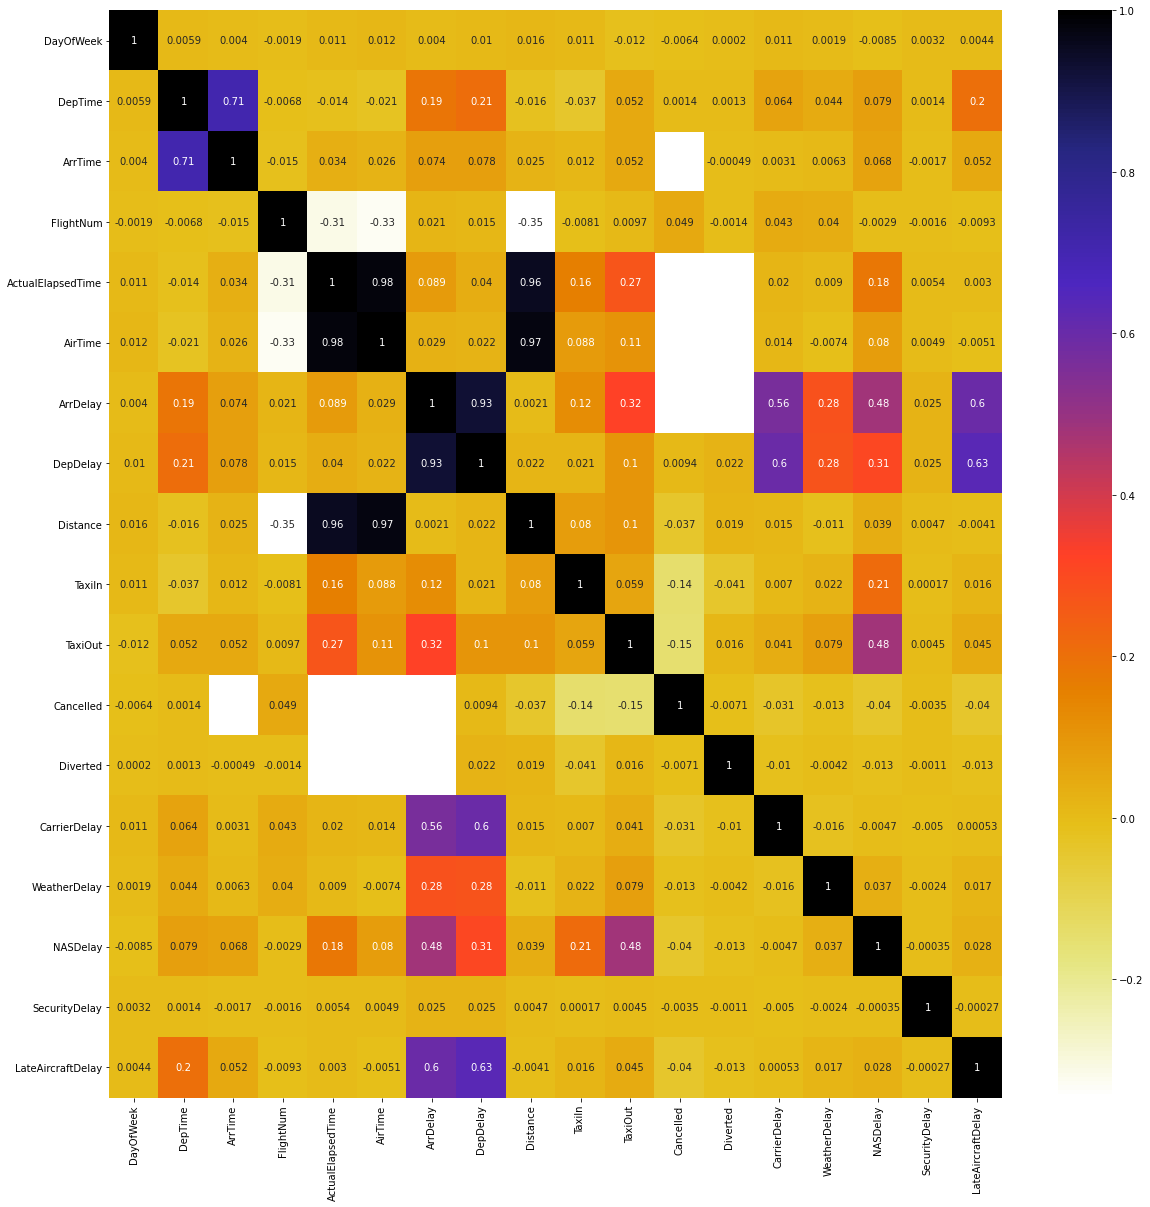

In [3]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, annot=True, cmap=plt.cm.CMRmap_r);
plt.show()

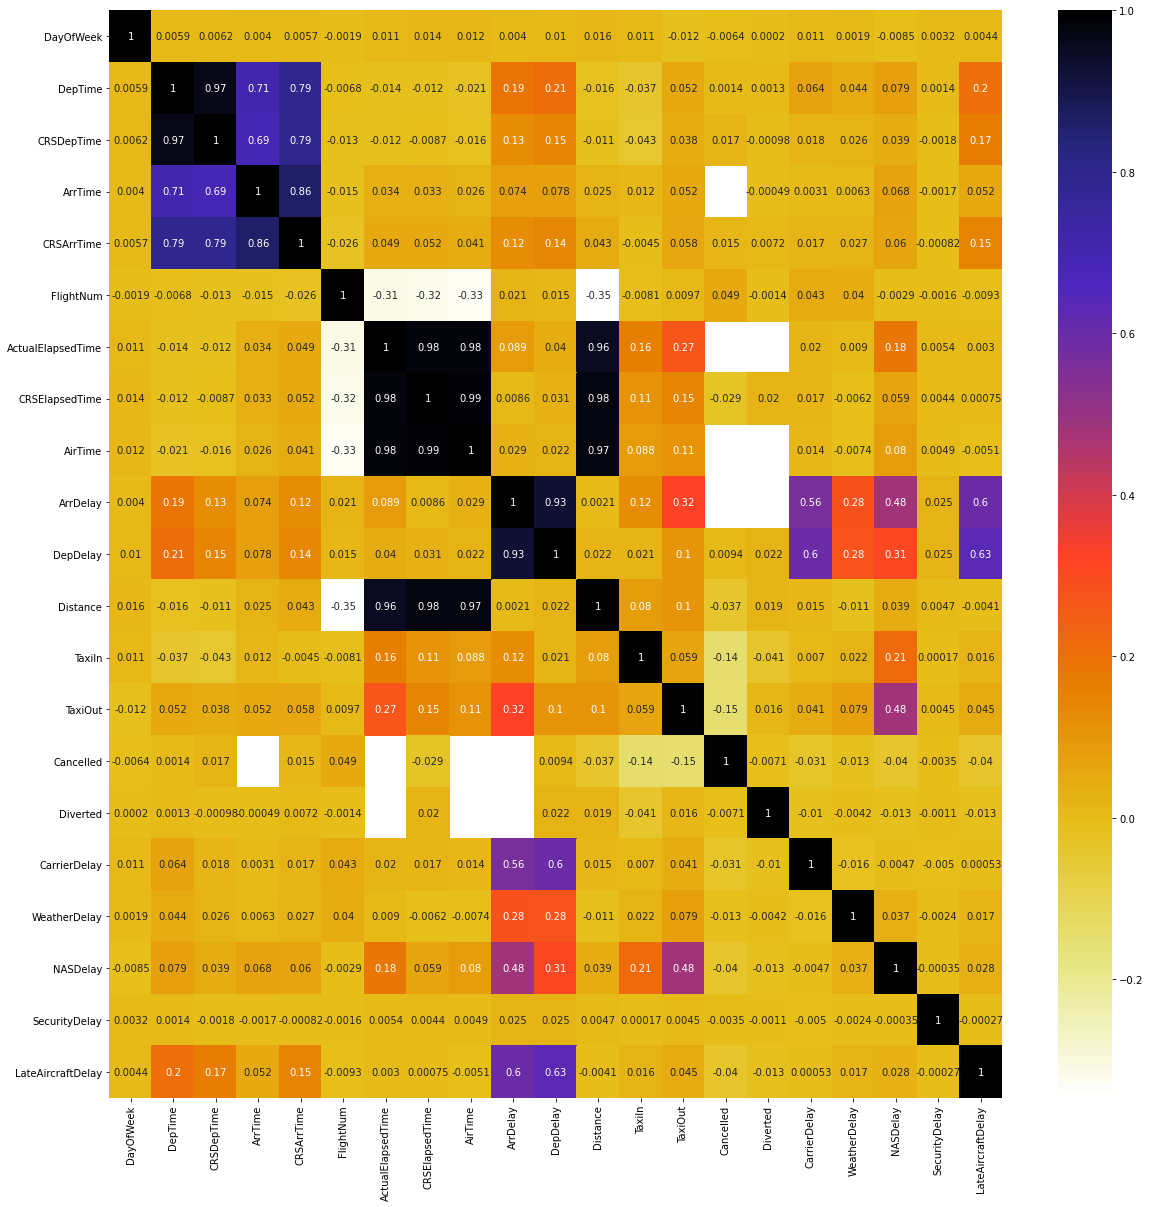

In [6]:
#Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)
for dataset in df:
    df.loc[df['ArrDelay'] <= 15, 'Status'] = 0
    df.loc[df['ArrDelay'] >= 15, 'Status'] = 1
    df.loc[df['ArrDelay'] >= 60, 'Status'] = 2
    df.loc[df['Diverted'] == 1, 'Status'] = 3
    df.loc[df['Cancelled'] == 1, 'Status'] = 4
    
    


In [7]:
df.isnull().sum()

DayOfWeek                   0
DepTime                296994
UniqueCarrier               0
ActualElapsedTime      332626
AirTime                332626
ArrDelay               332626
Origin                      0
Dest                        0
Distance                    0
TaxiIn                 151649
TaxiOut                137058
Cancelled                   0
CancellationCode     14164760
Diverted                    0
CarrierDelay          5484993
WeatherDelay          5484993
NASDelay              5484993
SecurityDelay         5484993
LateAircraftDelay     5484993
Depart_Date                 0
Status                      0
dtype: int64

In [8]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,CancellationCode,14164760,2.061703
1,LateAircraftDelay,5484993,62.075540
2,SecurityDelay,5484993,62.075540
3,NASDelay,5484993,62.075540
4,WeatherDelay,5484993,62.075540
5,CarrierDelay,5484993,62.075540
6,ActualElapsedTime,332626,97.700150
7,AirTime,332626,97.700150
8,ArrDelay,332626,97.700150
9,DepTime,296994,97.946518


In [9]:
variables_to_remove = ['CancellationCode']
df.drop(variables_to_remove, axis = 1, inplace = True)

In [10]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,LateAircraftDelay,5484993,62.075540
1,SecurityDelay,5484993,62.075540
2,NASDelay,5484993,62.075540
3,WeatherDelay,5484993,62.075540
4,CarrierDelay,5484993,62.075540
5,ActualElapsedTime,332626,97.700150
6,AirTime,332626,97.700150
7,ArrDelay,332626,97.700150
8,DepTime,296994,97.946518
9,TaxiIn,151649,98.951465


In [13]:
# replacing na values in college with No college
df["LateAircraftDelay"].fillna(0, inplace = True)
df["SecurityDelay"].fillna(0, inplace = True)
df["NASDelay"].fillna(0, inplace = True)
df["WeatherDelay"].fillna(0, inplace = True)
df["CarrierDelay"].fillna(0, inplace = True)

In [14]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,ActualElapsedTime,332626,97.700150
1,AirTime,332626,97.700150
2,ArrDelay,332626,97.700150
3,DepTime,296994,97.946518
4,TaxiIn,151649,98.951465
5,TaxiOut,137058,99.052351
6,LateAircraftDelay,0,100.000000
7,SecurityDelay,0,100.000000
8,NASDelay,0,100.000000
9,WeatherDelay,0,100.000000


In [ ]:
data = flights_needed_data.values
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)  # splitting in the ratio 70:30